In [ ]:
from scripts import parse_log as pl
from scripts import plot_data as dplt
import matplotlib.pyplot as plt
import matplotlib
import random as r
def createXYdata():
    data = [(i, r.randint(0, 100)) for i in range(20)]
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    return [x, y]
def plot_bar(x, y, ax, color, label):
    ax.bar(x, y, color = color, label = label)
    
fig, ax = plt.subplots()
x,y = createXYdata()
plot_bar(x, y, ax, "r", "red bars")
x,y = createXYdata()
plot_bar(x, y, ax, "k", "black bars")
x,y = createXYdata()
plot_bar(x, y, ax, "orange", "orange bars")



plt.legend()
plt.show()

In [135]:
from scripts import updated_plot_data as uplt
import matplotlib.pyplot as plt
import random as r
from scripts import updated_parse_data as upl
# Overhead : For development only.
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create bar plots comparing the runtime of [1...n] logs for any n > 0

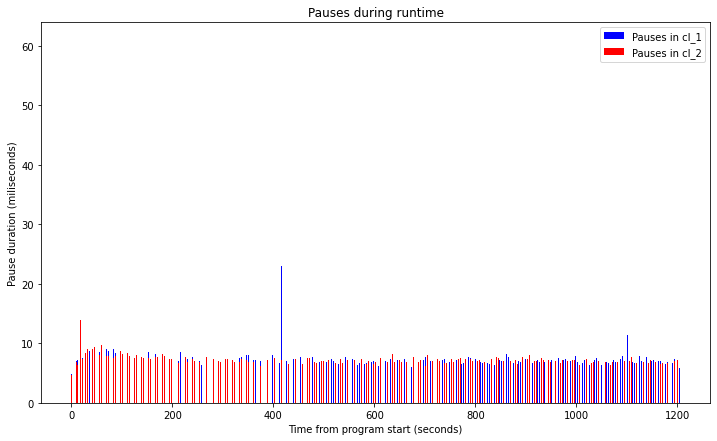

In [136]:

figure, axs = plt.subplots()

df_cl1  = upl.getPauses(logfile = "datasets/cl_1.log")
x, y    = uplt.get_combined_xy_pauses(p2_df)
uplt.plot_pauses_bar(x, y, axs, label = "Pauses in cl_1",  color = "blue")

df_cl2 = upl.getPauses(logfile = "datasets/cl_2.log")
x, y   = uplt.get_combined_xy_pauses(pauses_df)
uplt.plot_pauses_bar(x, y, axs, label = "Pauses in cl_2", color = "red")

plt.show()

Shenandoah


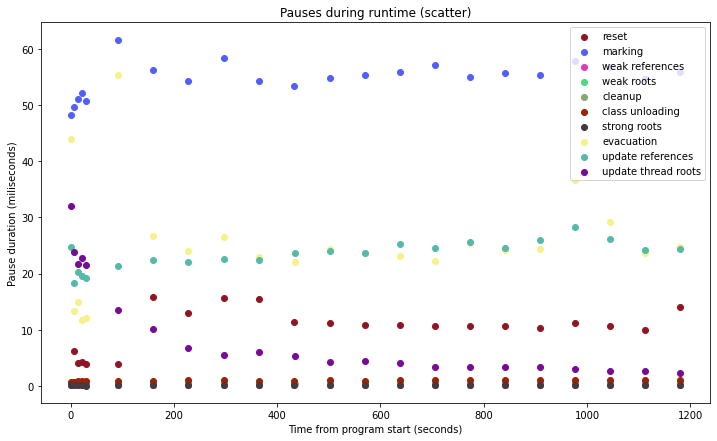

In [158]:
figure, axs = plt.subplots()
concurrent_data = upl.getConcurrentDurations("datasets/gc-many/shenandoah_log.log")


dict_mapping = {} # holds relationship between name and words

# Count how many different phase types we have
counter = 0
for phase in concurrent_data["ConcurrentPhase"]:
    if phase not in dict_mapping:
        dict_mapping[phase] = counter
        counter += 1
        
# Map everything from the phase type to the integer in the  list it represents.
cc_pause_indicies = []
for phase in concurrent_data["ConcurrentPhase"]:
    cc_pause_indicies.append(dict_mapping[phase])


# Update the pause data to use integer types
concurrent_data["PauseType"] = cc_pause_indicies
names = list([(key, dict_mapping[key]) for key in dict_mapping.keys()])
labels = [[] for i in range(len(names))]
for name in names:
    labels[name[1]] = name[0].strip()

def scatter_shenandoah(table):
    if table.empty:
        return
    # access the interesting information directly
    times = table["TimeFromStart_seconds"]
    pauses = table["PauseDuration_miliseconds"]
    types = table["PauseType"]
    
    # determine what types of pauses exist in this data
   
    numT = 0
    # determine the number of types
    for i in range(len(types)):
        numT = max(numT, types[i])
    
    pauseArray = [[[], []] for i in range(numT + 1)]

    # Arrange the data into buckets based on the pause type
    for i in range(len(types)):   
        pauseArray[types[i]][0].append(times[i])
        pauseArray[types[i]][1].append(pauses[i])
    return pauseArray

# Make sure to transform the duration from string -> float.
concurrent_data["PauseDuration_miliseconds"] = list(map(float, concurrent_data["PauseDuration_miliseconds"]))


pa=scatter_shenandoah(concurrent_data)    
for i in range(len(pa)):
    uplt.plot_pauses_scatter(pa[i][0], pa[i][1], axs, label = labels[i])
plt.show()
    
    
#dplt.plot_scatter(concurrent_data, labels = labels)
#print(cc_pause_type)
#print(concurrent_data)